## importing libraries

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

## reading data

In [54]:
data=pd.read_csv('house.csv')

In [55]:
data.shape

(21613, 18)

## checking first five values

In [56]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503


## checking dupilicates values

In [57]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  int64  
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

## describing the data

In [59]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.312543,2079.899736,1.510697e+04,1.542405,3.409430,7.656873,1788.390691,291.509045,1971.005136,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.865405,918.440897,4.142051e+04,0.567504,0.650743,1.175459,828.090978,442.575043,29.373411,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,2.000000,1427.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,2.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,3.000000,2550.000000,1.068800e+04,2.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## checking outliers

<Axes: >

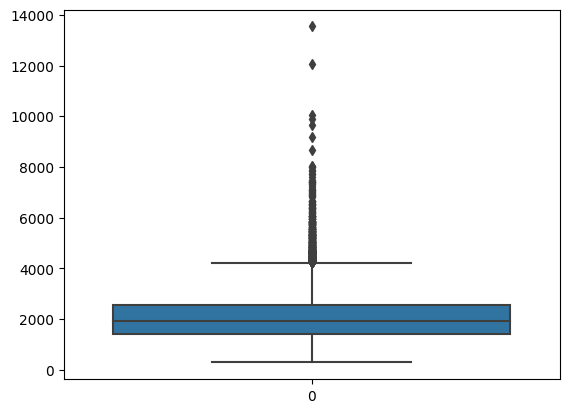

In [60]:
sns.boxplot(data['sqft_living'])

<Axes: >

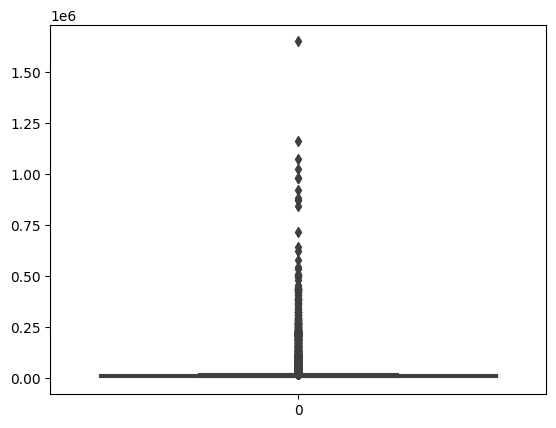

In [61]:
sns.boxplot(data['sqft_lot'])

In [62]:
 numerical_columns=data[['price','sqft_living','sqft_lot','condition','grade','sqft_above','sqft_basement']]

In [63]:
for col in numerical_columns:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_fence=Q1-(1.5*IQR)
    upper_fence=Q3+(1.5*IQR)
    data.loc[data[col]>upper_fence]=np.nan
    data.loc[data[col]<lower_fence]=np.nan
    data.fillna(data[col].median(),axis=0,inplace=True)

<Axes: >

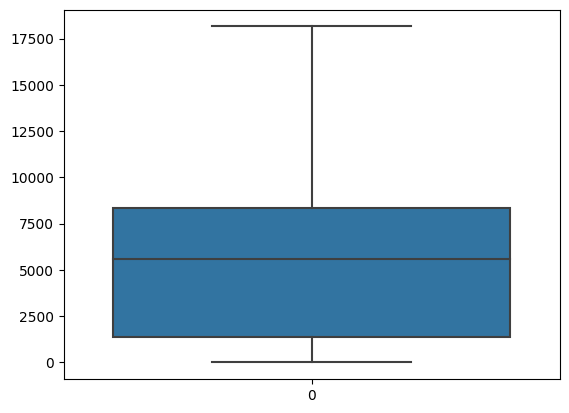

In [64]:
sns.boxplot(data['sqft_lot'])

<Axes: >

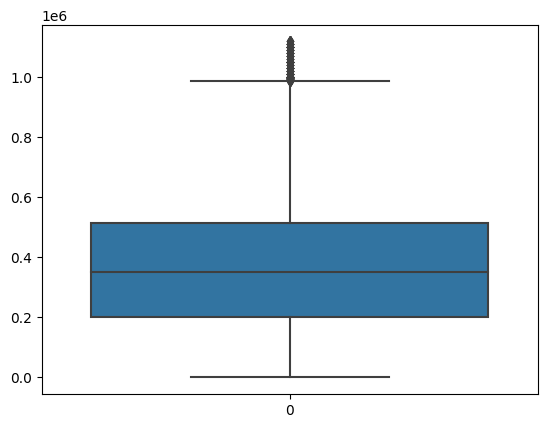

In [65]:
sns.boxplot(data['price'])

In [66]:
x=data.loc[:,["grade","sqft_living","floors","bathrooms","bedrooms","zipcode"]]

In [67]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.719744e+09,3.526286e+05,3.032527,2.188914,1416.488317,5528.091334,1.678157,3.163837,6.283024,1236.819692,180.155277,1545.680146,76957.802110,37.802464,-95.418293,1415.530607,5565.697451
std,3.201987e+09,2.510844e+05,1.062853,0.923646,919.926700,4179.427740,0.842855,0.954616,2.335557,831.116518,316.284720,809.099807,40320.209833,18.632503,51.181082,870.906040,4777.185147
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-122.512000,0.000000,0.000000
25%,4.860006e+08,2.000000e+05,3.000000,2.000000,880.000000,1380.000000,1.000000,3.000000,6.000000,810.000000,0.000000,1912.000000,98004.000000,47.307000,-122.318000,1090.000000,1531.000000
50%,3.180100e+09,3.500000e+05,3.000000,2.000000,1520.000000,5610.000000,2.000000,3.000000,7.000000,1260.000000,0.000000,1959.000000,98052.000000,47.524900,-122.193000,1550.000000,5668.000000
75%,6.815100e+09,5.150000e+05,4.000000,3.000000,2070.000000,8320.000000,2.000000,4.000000,8.000000,1750.000000,290.000000,1989.000000,98116.000000,47.659300,-121.996000,1980.000000,8200.000000
max,9.900000e+09,1.120000e+06,33.000000,5.000000,4200.000000,18150.000000,4.000000,5.000000,11.000000,3200.000000,1170.000000,2015.000000,98199.000000,47.777600,3.000000,4410.000000,196591.000000


In [68]:
y=data.loc[:,["price"]]

## spliting the data

In [69]:
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.3,random_state=442)

In [70]:
yte.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6484 entries, 15381 to 16309
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   6484 non-null   float64
dtypes: float64(1)
memory usage: 101.3 KB


## linear regression

In [72]:
lr_model = LinearRegression()
lr_model.fit(xtr, ytr)
ypred = lr_model.predict(xte)
linear_regression_score = r2_score(yte, ypred) * (100)
print("Accuracy of the model is ", linear_regression_score)

Accuracy of the model is  71.39323025825625


## decision tree

In [73]:
model_dt=DecisionTreeRegressor()
model_dt.fit(xtr,ytr)
ypred=model_dt.predict(xte)
DecisionTreeRegressor=r2_score(yte,ypred)*100
print("Accuracy of the model is ",DecisionTreeRegressor)

Accuracy of the model is  82.98843526964728


## random forest

In [74]:
model_rf=RandomForestRegressor()
model_rf.fit(xtr,ytr)
ypred=model_rf.predict(xte)
RandomForestRegressor=r2_score(yte,ypred)*100
print("Accuracy of the model is ",RandomForestRegressor)

C:\Users\SAI TEJA\anaconda3\envs\project\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy of the model is  89.80367876423061


## KNN

In [75]:
model_knn=KNeighborsRegressor()
model_knn.fit(xtr,ytr)
ypred=model_knn.predict(xte)
KNeighborsRegressor=r2_score(yte,ypred)*100
print("Accuracy of the model is ",KNeighborsRegressor)

Accuracy of the model is  72.63682779828822


## Xgboost

In [76]:
model_xgb=XGBRegressor()
model_xgb.fit(xtr,ytr)
ypred=model_xgb.predict(xte)
XGBRegressor=r2_score(yte,ypred)*100
print("Accuracy of the model is ",XGBRegressor)

C:\Users\SAI TEJA\anaconda3\envs\project\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\SAI TEJA\anaconda3\envs\project\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\SAI TEJA\anaconda3\envs\project\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\SAI TEJA\anaconda3\envs\project\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int o

Accuracy of the model is  91.31677557644696


C:\Users\SAI TEJA\anaconda3\envs\project\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\SAI TEJA\anaconda3\envs\project\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\SAI TEJA\anaconda3\envs\project\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\SAI TEJA\anaconda3\envs\project\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int o

In [77]:
y_train_pred=model_xgb.predict(xtr)
print(r2_score(ytr,y_train_pred)*100)

95.2566369709752


C:\Users\SAI TEJA\anaconda3\envs\project\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\SAI TEJA\anaconda3\envs\project\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\SAI TEJA\anaconda3\envs\project\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\SAI TEJA\anaconda3\envs\project\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int o

## Adaboost

In [78]:
model_ad=AdaBoostRegressor()
model_ad.fit(xtr,ytr)
ypred=model_ad.predict(xte)
AdaBoostRegressor=r2_score(yte,ypred)*100
print("Accuracy of the model is ",AdaBoostRegressor)

C:\Users\SAI TEJA\anaconda3\envs\project\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of the model is  62.19854826265


## predicting

In [79]:
df={'grade':7,
    'sqft_living':1370,
    'floors':2,
    'bathrooms':4,
   
    'bedrooms':3,
   
    'zipcode':98198

}

In [80]:
df1=pd.DataFrame(df,index=[0])

In [81]:
model_xgb.predict(df1)

C:\Users\SAI TEJA\anaconda3\envs\project\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\SAI TEJA\anaconda3\envs\project\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\SAI TEJA\anaconda3\envs\project\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\SAI TEJA\anaconda3\envs\project\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int o

array([224294.33], dtype=float32)

In [82]:
model_dt.predict(df1)

array([219000.])

In [83]:
model_lr.predict(df1)

array([[310261.32254301]])

In [84]:
model_knn.predict(df1)

array([[298230.]])

In [85]:
model_ad.predict(df1)

array([426714.03181885])